# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Problem Statement

In [2]:
#To Predict Price of Cellphones by Using Various Independent Variable

# Data Gathering

In [3]:
df = pd.read_csv("Cellphone.csv")
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [4]:
df.corr()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


# Exploratory Data Analysis

In [5]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [7]:
df.shape

(161, 14)

# To check Linearity 

In [8]:
df.corr()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


<Axes: >

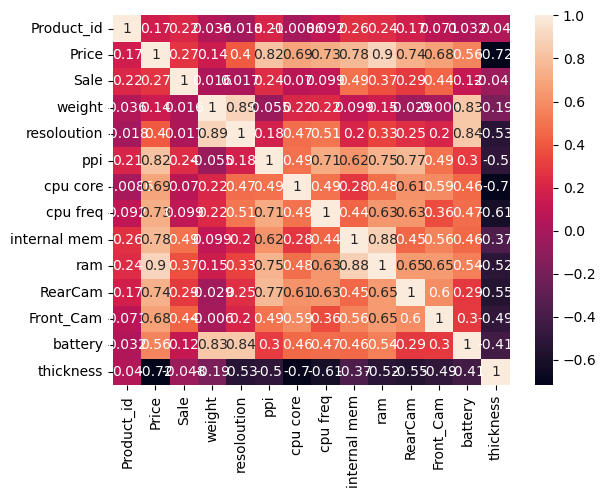

In [9]:
sns.heatmap(df.corr(),annot = True)

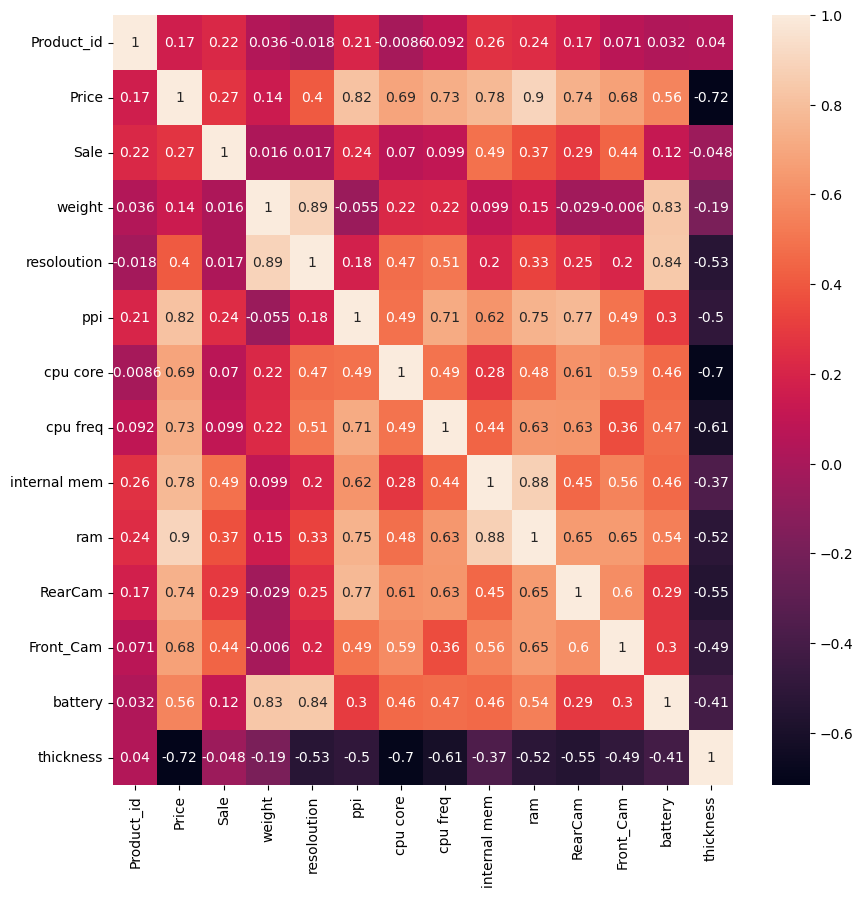

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig("Cellphone corr.png")

In [11]:
price =df.iloc[1]
price

Product_id       880.00
Price           1749.00
Sale              10.00
weight           125.00
resoloution        4.00
ppi              233.00
cpu core           2.00
cpu freq           1.30
internal mem       4.00
ram                1.00
RearCam            3.15
Front_Cam          0.00
battery         1700.00
thickness          9.90
Name: 1, dtype: float64

In [12]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

<Axes: ylabel='Density'>

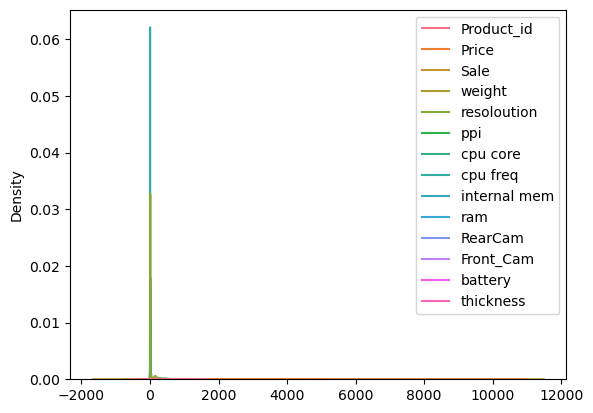

In [13]:
sns.kdeplot(df)

# No Multicolinirity

In [14]:
df.shape

(161, 14)

In [15]:
df.shape[1]

14

In [16]:
vif_list = []
for i in range(df.shape[1] -1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF of {df.columns[i]} >> ",vif)
    vif_list.append(vif)

VIF of Product_id >>  4.798983221030241
VIF of Price >>  144.43419111472235
VIF of Sale >>  2.079142110431124
VIF of weight >>  84.64029231814496
VIF of resoloution >>  144.4059405141456
VIF of ppi >>  38.54433542105631
VIF of cpu core >>  18.61080633723717
VIF of cpu freq >>  28.31784208382748
VIF of internal mem >>  13.458392899518177
VIF of ram >>  28.813569598090016
VIF of RearCam >>  14.826904267376491
VIF of Front_Cam >>  5.897191168427043
VIF of battery >>  60.6785124700984


In [17]:
vif_list

[4.798983221030241,
 144.43419111472235,
 2.079142110431124,
 84.64029231814496,
 144.4059405141456,
 38.54433542105631,
 18.61080633723717,
 28.31784208382748,
 13.458392899518177,
 28.813569598090016,
 14.826904267376491,
 5.897191168427043,
 60.6785124700984]

In [18]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [19]:
x = df.drop("Price", axis = 1)
x.columns

Index(['Product_id', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core',
       'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery',
       'thickness'],
      dtype='object')

<Axes: >

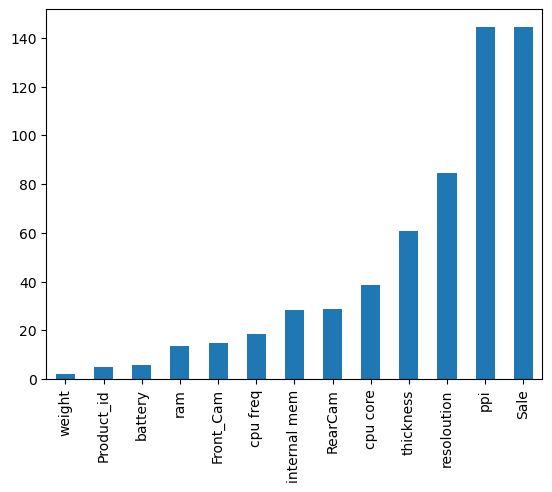

In [20]:
s1 = pd.Series(vif_list, index = x.columns)
s1.sort_values().plot(kind = "bar")

<Axes: >

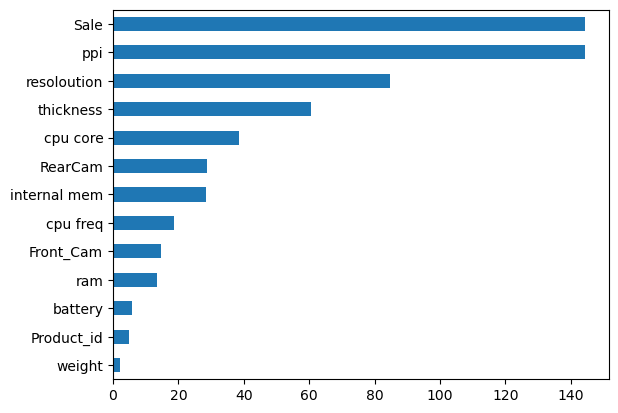

In [21]:
s1.sort_values().plot(kind = "barh")

## To find Outliers

<Axes: >

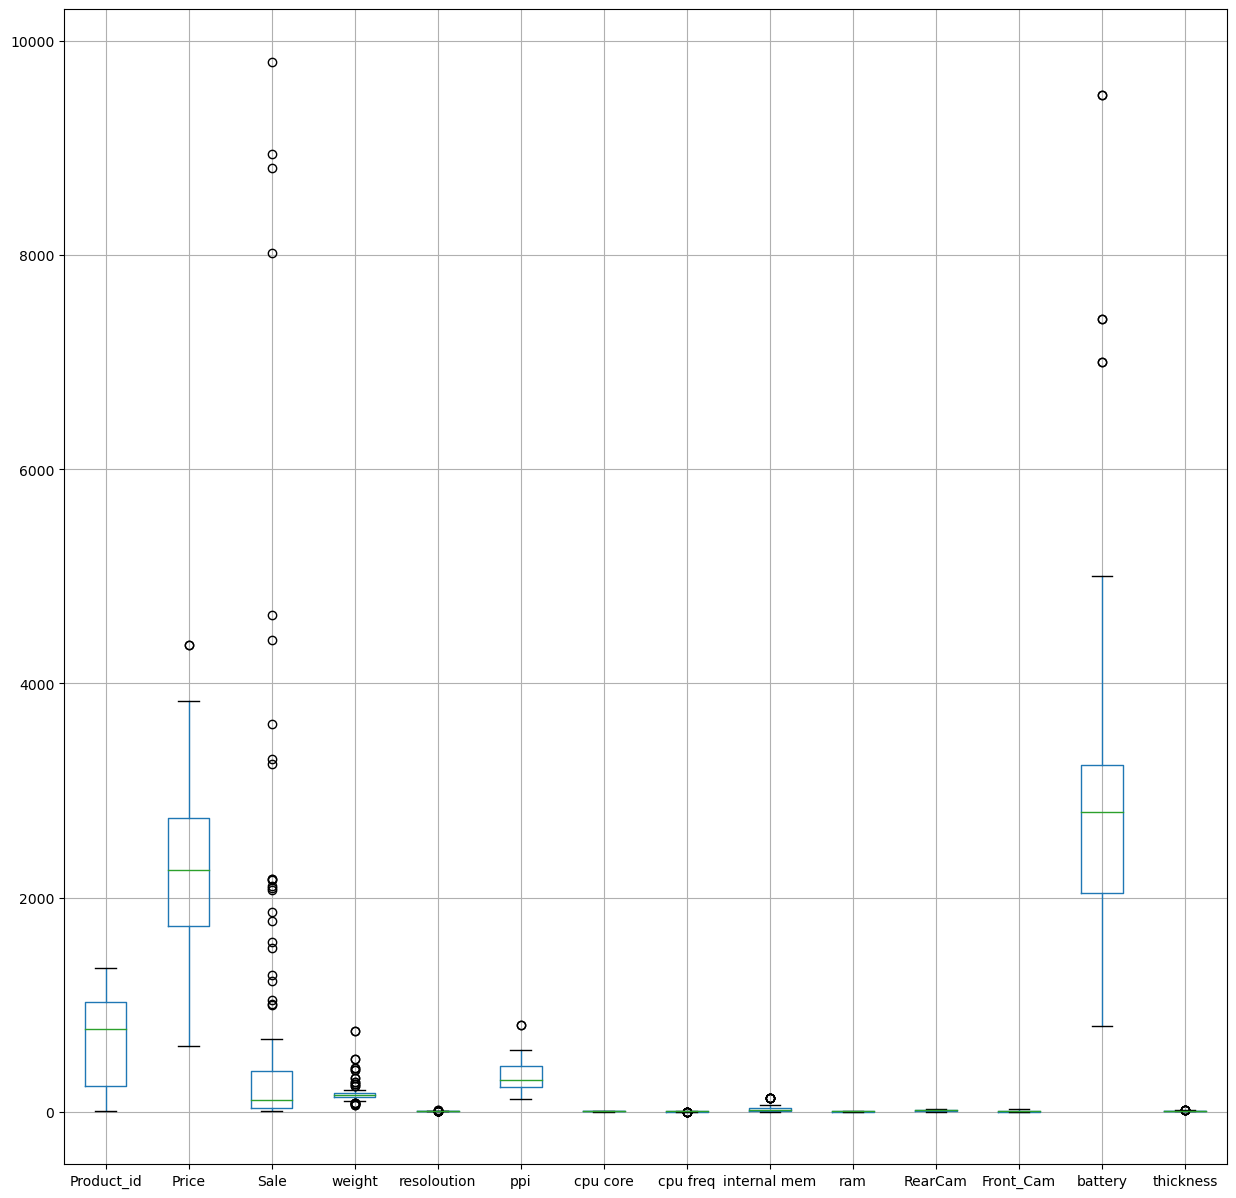

In [22]:
plt.figure(figsize = (15,15))
df.boxplot()

In [23]:
df["Sale"]

0        10
1        10
2        10
3        11
4        11
       ... 
156    4638
157    8016
158    8809
159    8946
160    9807
Name: Sale, Length: 161, dtype: int64

<Axes: >

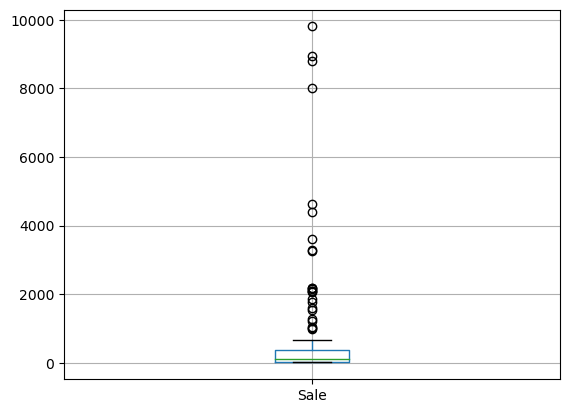

In [24]:
df[['Sale']].boxplot()

<Axes: xlabel='Sale'>

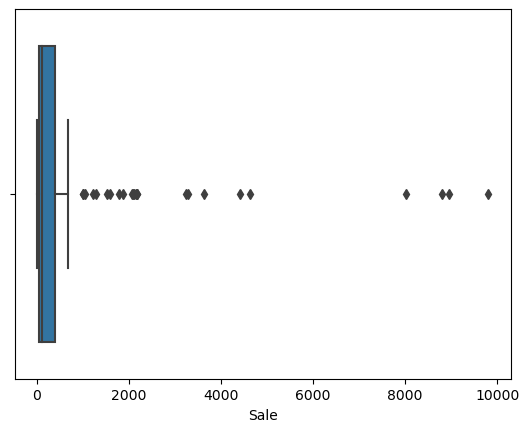

In [25]:
sns.boxplot(x = df['Sale'])

<Axes: xlabel='Sale', ylabel='Density'>

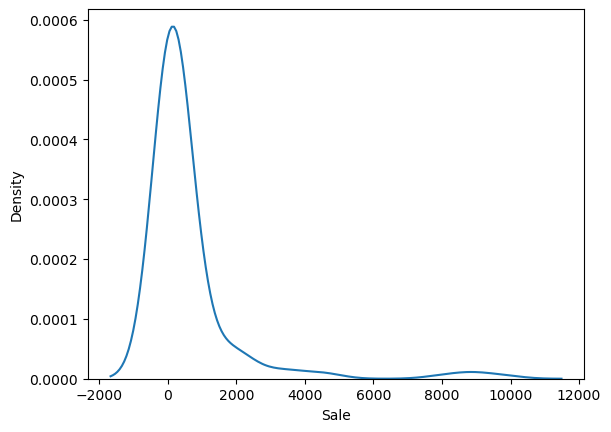

In [26]:
sns.kdeplot(df["Sale"])

<Axes: xlabel='Sale', ylabel='Density'>

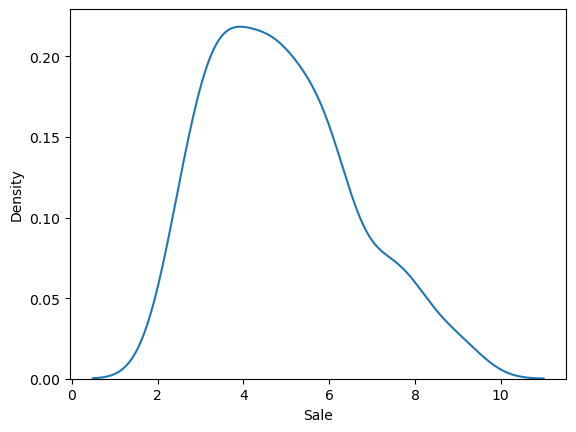

In [27]:
sns.kdeplot(np.log(df['Sale']))

<Axes: xlabel='Sale'>

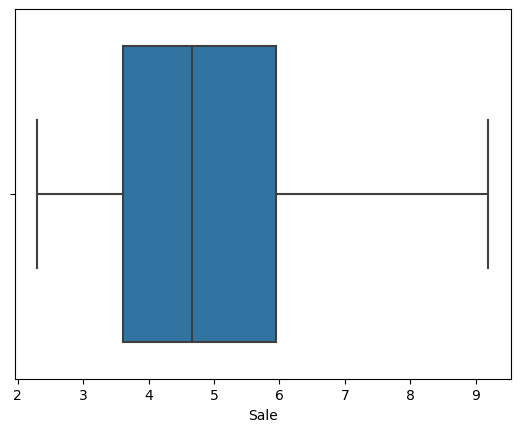

In [28]:
sns.boxplot(x = np.log(df["Sale"]))

In [29]:
df['weight']

0      135.0
1      125.0
2      110.0
3      118.5
4      125.0
       ...  
156    178.0
157    170.0
158    150.0
159    170.0
160    202.0
Name: weight, Length: 161, dtype: float64

<Axes: >

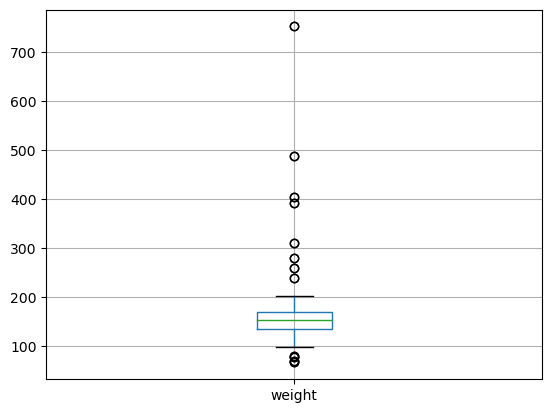

In [30]:
df[['weight']].boxplot()

<Axes: >

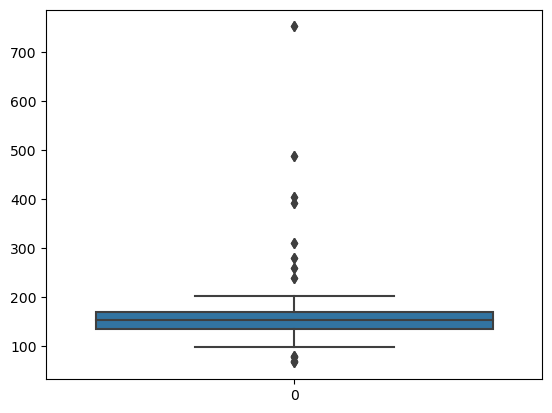

In [31]:
sns.boxplot(df["weight"])

<Axes: xlabel='weight', ylabel='Density'>

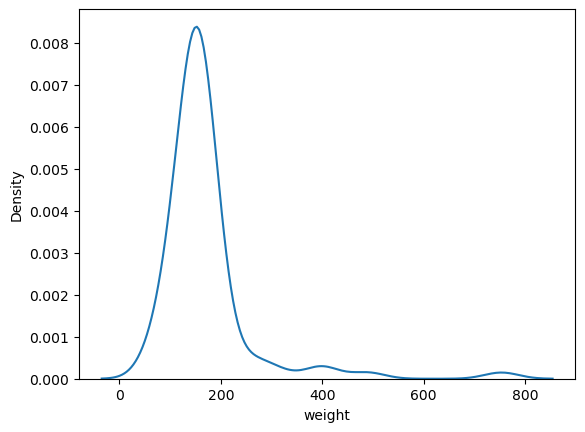

In [32]:
sns.kdeplot(df["weight"])

<Axes: xlabel='weight', ylabel='Density'>

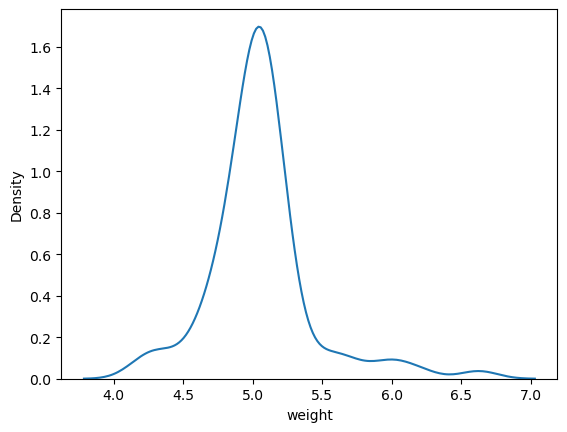

In [33]:
sns.kdeplot(np.log(df['weight']))

<Axes: xlabel='weight'>

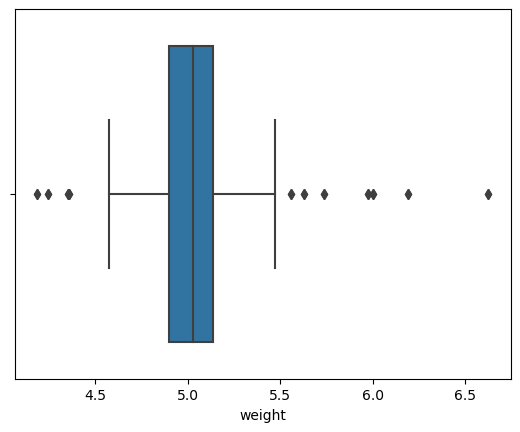

In [34]:
sns.boxplot(x = np.log(df['weight']))

<Axes: xlabel='weight', ylabel='Density'>

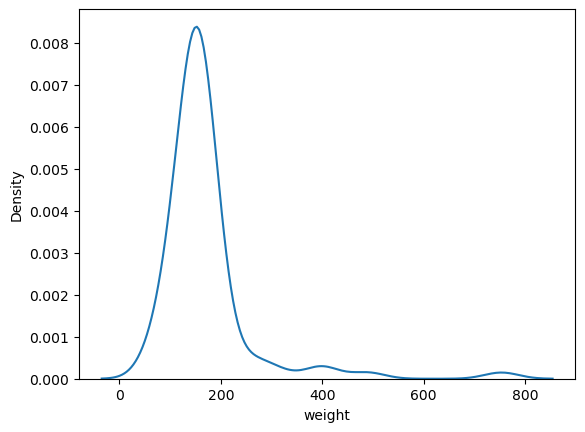

In [35]:
sns.kdeplot(df["weight"])

In [36]:
from scipy.stats import boxcox

In [37]:
weight = boxcox(df["weight"])[0]

<Axes: ylabel='Density'>

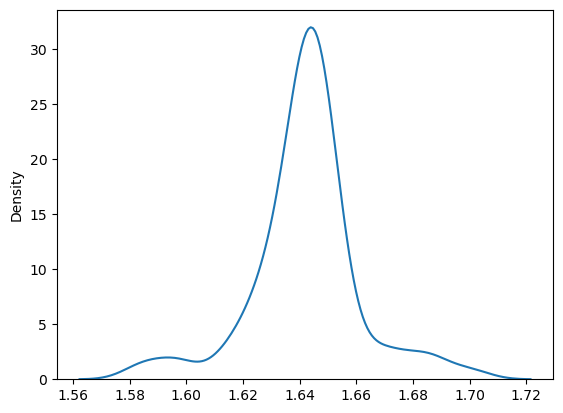

In [38]:
sns.kdeplot(weight)

<Axes: >

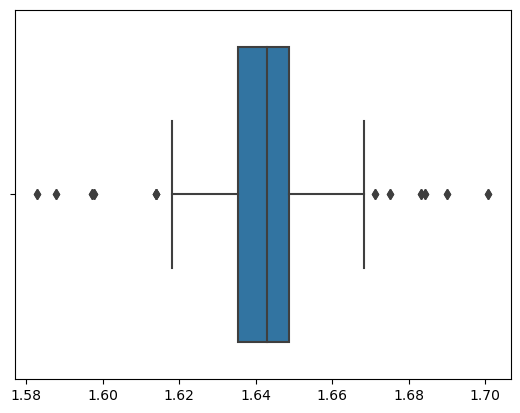

In [39]:
sns.boxplot(x = weight)

array([[<Axes: title={'center': 'Product_id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Sale'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'resoloution'}>,
        <Axes: title={'center': 'ppi'}>,
        <Axes: title={'center': 'cpu core'}>,
        <Axes: title={'center': 'cpu freq'}>],
       [<Axes: title={'center': 'internal mem'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'RearCam'}>,
        <Axes: title={'center': 'Front_Cam'}>],
       [<Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'thickness'}>, <Axes: >, <Axes: >]],
      dtype=object)

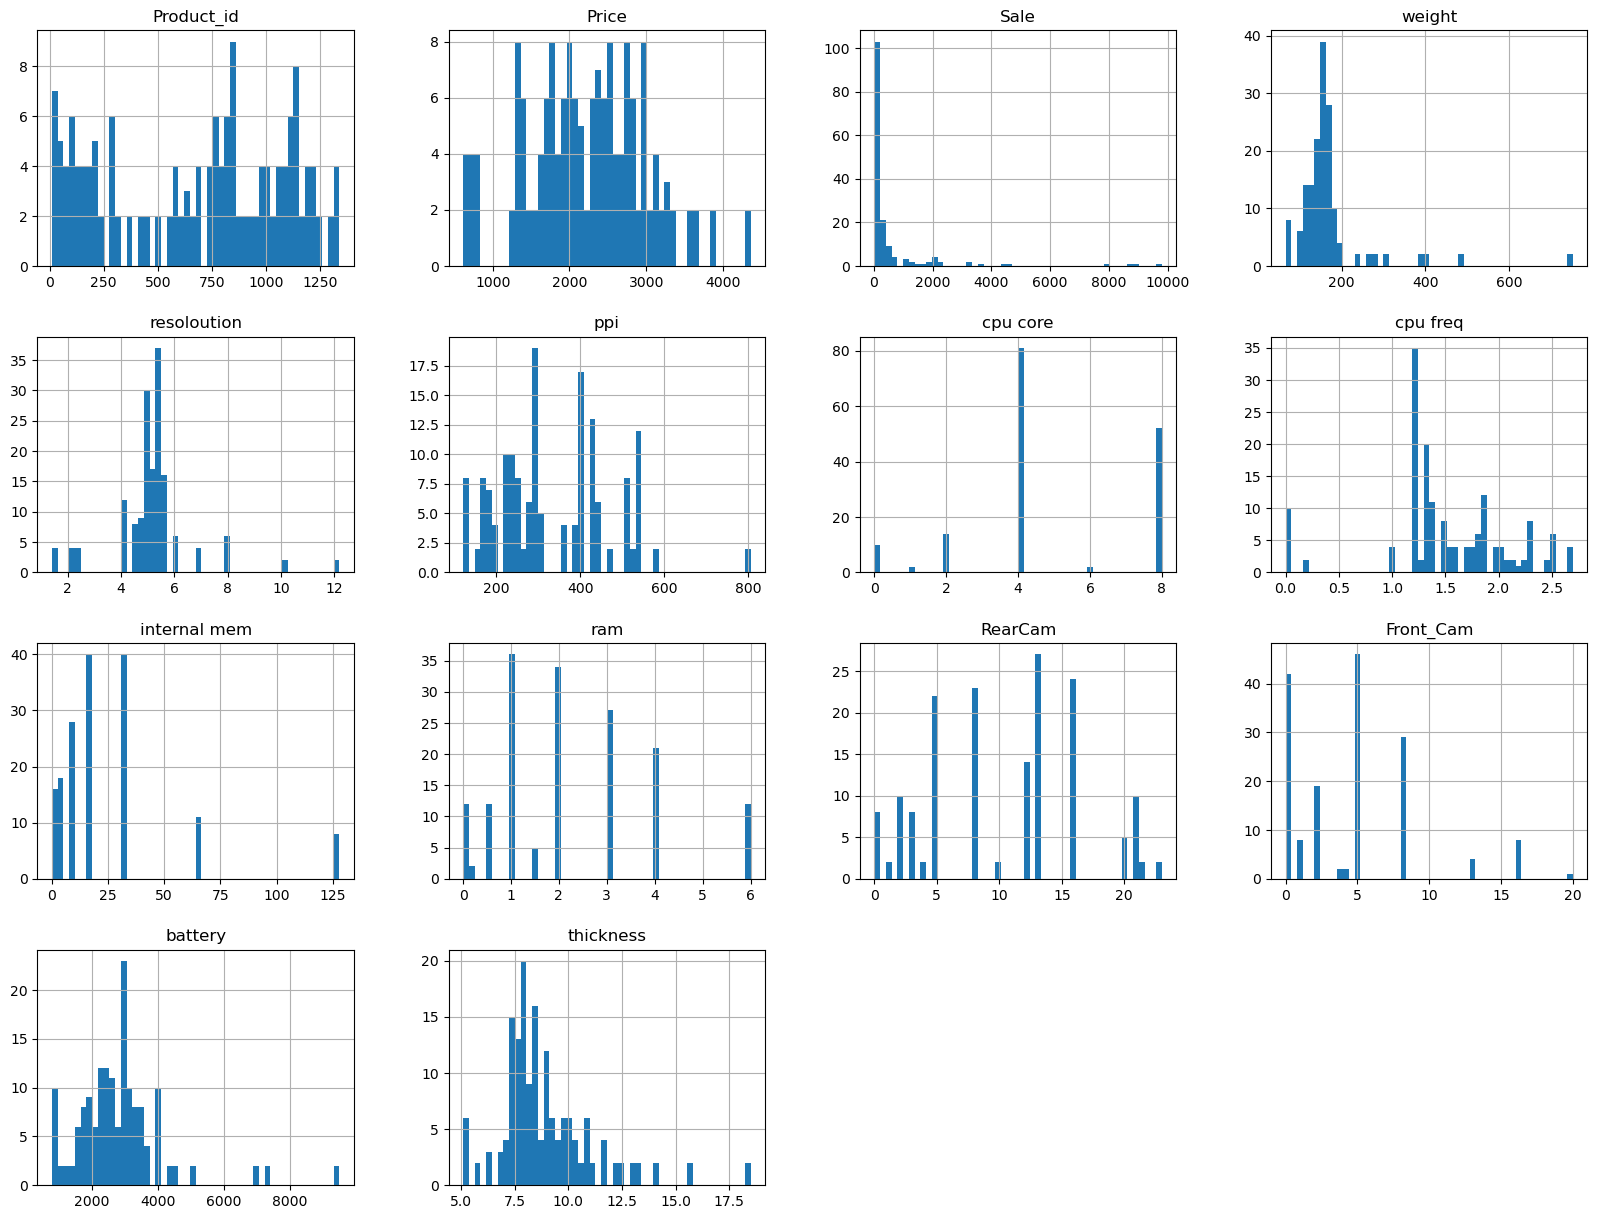

In [40]:
df.hist(bins = 50,figsize=(20,15))

## Model Training

In [41]:
x

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [42]:
y = df['Price']

## Train Test Split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [44]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [45]:
lr_model.coef_

array([ 4.14638783e-02, -3.22110377e-02, -3.31692674e-01, -1.03397074e+02,
        7.85153503e-01,  6.36929959e+01,  1.29551845e+02,  6.68685782e+00,
        9.53457928e+01,  6.33896667e+00,  8.24503114e+00,  1.41141952e-01,
       -7.29038810e+01])

In [46]:
lr_model.intercept_

1815.2184740171008

## Model Evaluation

In [47]:
# Training data Evaluation
y_pred = lr_model.predict(x_train)


MSE = mean_squared_error(y_train,y_pred)
print("Mean Squared Error:",MSE)
print("*"*60)

MAE = np.sqrt(MSE)
print("Mean Absolute error:",MAE)
print("*"*60)

r2_score = r2_score(y_train,y_pred)
print("R2 Score :",r2_score)

Mean Squared Error: 25389.26986439156
************************************************************
Mean Absolute error: 159.3401075197063
************************************************************
R2 Score : 0.9585131734486976


In [48]:
# Testing data Evaluation
y_pred_test = lr_model.predict(x_test)


MSE = mean_squared_error(y_test,y_pred_test)
print("Mean Squared Error:",MSE)
print("*"*80)

MAE = np.sqrt(MSE)
print("Mean Absolute error:",MAE)
print("*"*80)

#r_squared = r2_score(y_test,y_pred_test)
#print("R2 Score :",r_squared)

Mean Squared Error: 36599.8178074863
********************************************************************************
Mean Absolute error: 191.31078852873483
********************************************************************************


In [49]:
r_squared = lr_model.score(x_test,y_test)   #>>r2 value
print("R Squared value :",r_squared)

R Squared value : 0.9097222753670616


In [50]:
r_squared = lr_model.score(x_train,y_train)   #>>r2 value
print("R Squared value :",r_squared)

R Squared value : 0.9585131734486976


In [51]:
import pickle

In [52]:
with open("lr_model.pickle",'wb') as f:
    pickle.dump(lr_model,f)

## Testing On Single Row

In [53]:
x.head(1).T

,0
Product_id,203.00
Sale,10.00
weight,135.00
resoloution,5.20
ppi,424.00
cpu core,8.00
cpu freq,1.35
internal mem,16.00
ram,3.00
RearCam,13.00


In [54]:
Sale = 10.00
weight = 135.00
resoloution = 5.20
ppi = 424.00
cpu core = 8.00
cpu freq = 1.35
internal mem = 16.00
ram = 3.00
RearCam = 13.00
Front_Cam = 8.00
battery = 2610.00
thickness = 7.40

#Price = ???

SyntaxError: invalid syntax (2015730759.py, line 5)

In [55]:
project_data = {'columns':list(x.columns)}
project_data

{'columns': ['Product_id',
  'Sale',
  'weight',
  'resoloution',
  'ppi',
  'cpu core',
  'cpu freq',
  'internal mem',
  'ram',
  'RearCam',
  'Front_Cam',
  'battery',
  'thickness']}

In [56]:
import json

In [57]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)